# **Introduction to Molecular Simulation by Monte Carlo simulation of one dimensional Lennard-Jones system**

In physics and chemistry, we always want to understand the properties of a macroscopic system including Energy (E), Volume (V), Pressure (P), Temperature (T), etc. They can be expressed by the ensemble average of a physical observable in 
equilibrium statistical mechanics described by the following function. 

$I=\int \mathrm{d} \mathrm{x} \phi(\mathrm{x}) f(\mathrm{x})$

where x is an n-dimensional vector, φ(x) is an arbitrary function, and f(x) is a function
satisfying the properties of a probability distribution function, namely f(x) ≥ 0 and

$\int \mathrm{d} \mathrm{x} f(\mathrm{x})=1.$

In order to calculate the average of interested property of a system, one needs to generate samples, which is also called a microstate, of the system. There are many sampling methods developed and Monte Carlo method is one of the most widely used. In this work, we will demonstrate the underlying details of Metropolis Monte Carlo, one in Monte Carlo method family, by generating samples of a two one-dimensional neutral particles system. We will use Lennard-Jones potential to describe the energy between those two particles.

 As a form of interatomic potential proposed by John Lennard-Jones in 1924, [___Lennard-Jones potential___](https://en.wikipedia.org/wiki/Lennard-Jones_potential) is a mathematically simple model for approximation of interaction between a pair of neutral atoms or molecules.<br />
It is commonly expressed by 

$V_{\mathrm{LJ}}=4 \varepsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]=\varepsilon\left[\left(\frac{r_{\mathrm{m}}}{r}\right)^{12}-2\left(\frac{r_{\mathrm{m}}}{r}\right)^{6}\right]$




In this work, we will show the simulation of "two one-dimensional neutral particles Lennard-Jones" system by applying ___Metropolis Monte Carlo___ (MC) simulation technique.The central part of Metropolis MC algorithm consists of the following two items:
 1.   Generate a new random system configuration (a new microstate). This is supposed to be based on a random move of the previous configurations (the old microstate).
 2.   Evaluate the Metropolis criterion. If the criterion is true, it will add the new configuration to the move list; if the criterion is false, it will add the previous configuration once again to the move list.<br />

By following the above idea, we define the probability of accepting a new microstate as 

$\min [1, \mathbf{e^{-\frac{\Delta E}{k_bT}}}]$, 

where $\Delta E$ is the energy difference between the new microstate and its previous microstate $E_{new} - E_{old}$, $k_b$ is Boltzmann constant and $T$ is temperature. Intuitively, if the energy of new microstate is lower than its previous one, we always accept this new generated sample because $\mathbf{e^{-\frac{\Delta E}{k_bT}}}$ is not smaller than 1. On the other hand, if the energy of new microstate is higher than its previous one, which means $\mathbf{e^{-\frac{\Delta E}{k_bT}}}$ is smaller than 1, we will generate a random number between 0 and 1 to determine whether we will accept the new generated microstate or not. In this case, if $\mathbf{e^{-\frac{\Delta E}{k_bT}}}$ is not smaller than the generated random number between 0 and 1, we will accept the new microstate and reject otherwise. This means if $\Delta E$ is a large positive number (the energy of new microstate is much higher than the old one and $\mathbf{e^{-\frac{\Delta E}{k_bT}}}$ is a positive number around 0), the probability of accepting the new one is very small because the probability of generating a larger number than $\mathbf{e^{-\frac{\Delta E}{k_bT}}}$ from 0 to 1 is high.


## Introduction
#### The following block of algorithm shows how the above ideas are achieved:

In [9]:
#First, we need to "import" some useful librabies for calculation and ploting
import random
import math
import sys
import copy
import matplotlib.pyplot as plt
import time
import matplotlib
import numpy as np
%matplotlib inline

In [14]:
#We also need to define the following constant parameters 
steps=20000     #the number of new samples we want to generate
sigma   = 1     #parameter for Lennard-Jones potential
epsilon = 2     #parameter for Lennard-Jones potential
L=3*sigma       #The cutoff of simulation. Because we only interested in the (0, L) region, 
                #we defined L to only generate samples in this region
delta=0.5       #The largest move in each new trial, this will affect E_new - E_old. 
temp=300        #Temperature
kb=1.38e-23*6.022e23/(1000*4.184)       #Boltzmann constant in the unit of kcal/mol

In [15]:
#Then, we need to define some helpful functions for starting our simulation (generating new samples)
def cutoff(r):
    '''
    This is the function defined for only generating samples in (0, L) region.
    If the new r is larger than L, we will send it back to r-L.
    If the new r is smaller than 0, we will send it back to r+L.
    '''
    if r > L:
        r -= L
    elif r < 0:
        r += L
    return r

def energy(r,epsilon):
    '''
    This is the function defined for calculating the energy of the system 
    based on Lennard-Jones potential.
    '''
    energy = 4*epsilon*(((sigma/r)**12)-((sigma/r)**6))
    return energy

def move(diff_e,e,r,temp):
    '''
    This is the function defined for generating new samples based on accepting 
    or rejecting criterion described above.
    '''
    if diff_e < 0:
        
        e += diff_e
    else:
        rand = random.random()
        if math.exp(-diff_e/(kb*temp)) > rand:
            
            e += diff_e
        else:
            r = origi
            e = pre_e
    return r,e

Accepted ratio = 0.46
Average r = 1.39
r = 1.12 has lowest energy
***** 2.06 seconds *****


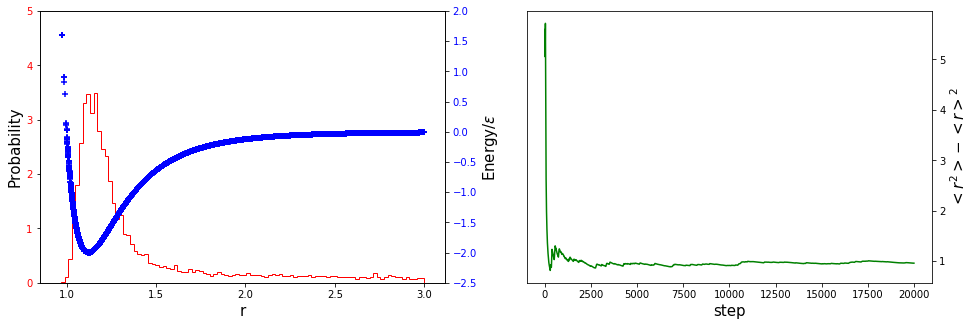

In [21]:
#Let's initialize our system
start = time.time()      #we want to record how long the simulation is.
r = random.uniform(0,L)  #First step, let's get a random sample between 0 and L
e = energy(r,epsilon)    #Then, let's calculate its energy
r_data=[r]               #Let's use a list to record all the samples
r2_data=[r**2]           #This is just another list for recording the square of each sample
e_data=[e]               #Let's use another list to record energy of each sample
r_ave=[r]                #This is a list for recording the average of all previous samples in each step
r2_ave=[r**2]            #This is another list for recording the average of the square of all previous samples in each step
#Let's run it!
acc_step = 0             #We want to record how many steps we actually accepted. Obviously, it starts from 0.
for step in range(0,steps):   #Let's start generate samples iterately and stop until "steps" (which is 10000 defined before)
    origi = copy.deepcopy(r)  #This is our previous sample
    pre_e = e                 #This is the energy of previous sample
    r += random.uniform(-1,1)*delta     #Then, we generate a new sample by moving the previous sample.
                                        #In this case, the new sample r_new = r_old + or - a, where a is a random number 
                                        #between -0.5 and 0.5, which is defined by the largest move delta
    r = cutoff(r)                       #Of course we want the new sample stay in the range of (0, L)
    new_e = energy(r,epsilon)           #And we want to know the energy of the new sample
    diff_e = new_e - pre_e              #We need to calculate E_new - E_old
    r,e = move(diff_e,e,r,temp)         #Let's use our "move" function to decide whether we will accept the new sample or not
    if r != origi:                      #We want to record how many steps we accepted
        acc_step += 1
    r_data.append(r)                    #We want to record the new sample and its all other properties like energy done below this line
    r2_data.append(r**2)                
    e_data.append(e)
    r_ave.append(sum(r_data)/len(r_data))
    r2_ave.append(sum(r2_data)/len(r2_data))
acc_ratio = acc_step/steps              #We want to know our acceptance ratio by calculating {actually accepted steps}/{total simulation steps} 
print('Accepted ratio =',round(acc_ratio,2))
print('Average r =',round(sum(r_data)/len(r_data),2))
print('r =',round(r_data[e_data.index(min(e_data))],2),'has lowest energy')
fig,ax1 = plt.subplots(1,2,figsize=(16,5))
ax1[0].hist(r_data,density='true',bins=100,color='red',histtype='step')
ax1[0].set_ylabel('Probability',fontsize=15)
ax1[0].set_xlabel('r',fontsize=15)
ax1[0].set_ylim(0,5)
ax1[0].tick_params(axis='y',labelcolor='red')
ax2 = ax1[0].twinx()
ax2.scatter(r_data,e_data,color='blue',marker='+')
ax2.set_ylabel(r'Energy/$\epsilon$',fontsize=15)
ax2.tick_params(axis='y',labelcolor='blue')
ax2.set_ylim(-2.5,2)
ax1[1].plot(range(1,len(r_data)+1),np.array(r2_ave)-np.array(np.sqrt(r_ave)),'green')
ax1[1].set_xlabel('step',fontsize=15)
ax1[1].yaxis.set_label_position("right")
ax1[1].yaxis.tick_right()
ax1[1].set_ylabel(r'$<r^2>-<r>^2$',fontsize=15)
print("***** %s seconds *****" % (round(time.time() - start, 2)))

__Figure 1.__ (1) Simulation result for each step and energy (blue) and probability for all steps (red) ; (2) Step fluctuation along the simulation (green).

__The result shows that__ Metropolis MC algorithm is able to generate samples of "two one-dimensional neutral particles Lennard-Jones" system. In addition, this algotithm works well for finding minimum potential energy as the highest probability. Then we can start to calculate the property of the macroscopic system, which is just the average of all generated samples described in the beginning. The result of 'r' fluctuation is shown in the right side figure, which reflects that Metropolis MC simulation for one dimenional Lennard-Jones potential quickly achieve equilibrium. <br /> 

## Result
#### In this section, I will show how parameters like  epsilon, temperature affect simulation results.

#### 1.  Temperature effect on simulation result:

Temperature = [50, 100, 200, 300, 500, 1000]
Accepted ratio = [0.1, 0.16, 0.3, 0.47, 0.66, 0.78]
***** 3 seconds *****


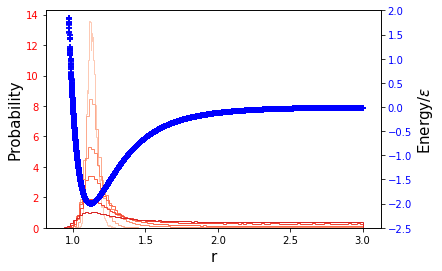

In [23]:
temp1=[50,100,200,300,500,1000]
start = time.time()
#initialize system
steps=200000
r = random.uniform(0,L)
r_data=np.zeros((6,steps))
e_data=np.zeros((6,steps))
#run mc with different temperature
acc_ratio=[]
for i in range(6):
    acc_step = 0
    e = energy(r,epsilon)
    for step in range(0,steps):
        origi = copy.deepcopy(r)
        pre_e = e
        r += random.uniform(-1,1)*delta
        r = cutoff(r)
        new_e = energy(r,epsilon)
        diff_e = new_e - pre_e
        r,e = move(diff_e,e,r,temp1[i])
        if r != origi:
            acc_step += 1
        r_data[i][step]=r
        e_data[i][step]=e
    acc_ratio.append(round(acc_step/steps,2))
print('Temperature =',temp1)
print('Accepted ratio =',acc_ratio)
fig,ax1 = plt.subplots()
cmap=matplotlib.cm.get_cmap('Reds')
for i in range(6):
    ax1.hist(r_data[i],density='true',bins=100,color=cmap((i+2)/10),histtype='step')
ax1.set_ylabel('Probability',fontsize=15)
ax1.set_xlabel('r',fontsize=15)
ax1.tick_params(axis='y',labelcolor='red')
ax2 = ax1.twinx()
ax2.scatter(r_data[3],e_data[3],color='blue',marker="+")
ax2.set_ylabel(r'Energy/$\epsilon$',fontsize=15)
ax2.tick_params(axis='y',labelcolor='blue')
ax2.set_ylim(-2.5,2)
print("***** %s seconds *****" % (round(time.time() - start)))

__Figure 2.__ Simulation results with different temperature. The color darkness increases with the increase of temperature.

__By changing temperature__, the result shows that the probability of staying at the minimum of potential energy basin decrease with the increase of temperature. This is reasonable as the move criterion  $\mathbf{e^{-\frac{\Delta E}{k_bT}}}$  would become lower under higher temperature. From the output of accepted ratio, we can also see similar issue that the accepted ratio would be higher under higher temperature. However, temperature change will not affect the potential energy form as all simulations under different temperatures provide same output potential energy shown in the above figure. The results indicate that under higher temperature, we can explore the energy configuation space with higher probability for high energy configuration while using Metropolis MC algorithm and it would easily stay in the minima region under lower temperature.

#### 2.  Epsilon effect on simulation result:

Epsilon = [1, 2, 3, 4, 8, 12]
Accepted ratio = [0.68, 0.45, 0.28, 0.23, 0.13, 0.1]
***** 0.5770952701568604 seconds *****


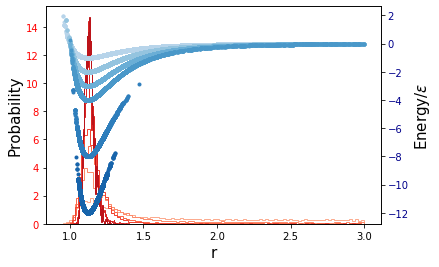

In [24]:
start = time.time()
epsilon = [1,2,3,4,8,12]
steps=20000
#initialize system
r = random.uniform(0,L)
r_data=np.zeros((6,steps))
e_data=np.zeros((6,steps))
#run mc with different epsilon
acc_ratio=[]
for i in range(6):
    acc_step = 0
    e = energy(r,epsilon[i])
    for step in range(0,steps):
        origi = copy.deepcopy(r)
        pre_e = e
        r += random.uniform(-1,1)*delta
        r = cutoff(r)
        new_e = energy(r,epsilon[i])
        diff_e = new_e - pre_e
        r,e = move(diff_e,e,r,temp)
        if r != origi:
            acc_step += 1
        r_data[i][step]=r
        e_data[i][step]=e
    acc_ratio.append(round(acc_step/steps,2))
print('Epsilon =',epsilon)
print('Accepted ratio =',acc_ratio)
fig,ax1 = plt.subplots()
cmap=matplotlib.cm.get_cmap('Reds')
for i in range(6):
    ax1.hist(r_data[i],density='true',bins=100,color=cmap((i+3)/10),histtype='step')
ax1.set_ylabel('Probability',fontsize=15)
ax1.set_xlabel('r',fontsize=15)
ax1.tick_params(axis='y',labelcolor='red')
ax2 = ax1.twinx()
cmap=matplotlib.cm.get_cmap('Blues')
for i in range(6):
    ax2.scatter(r_data[i],e_data[i],color=cmap((i+3)/10),marker='.')
ax2.set_ylabel(r'Energy/$\epsilon$',fontsize=15)
ax2.tick_params(axis='y',labelcolor='darkblue')
print("***** %s seconds *****" % (time.time() - start))

__Figure 3.__ Simulation results with different epsilon. The color darkness increases with the increase of epsilon.

__By changing epsilon__, we can clearly see its effect on both configuration sampling probability and potential energy form. Under larger epsilon, the minimum potential energy willbe lower, which can be seen from the potential energy formula and also the above figure. The accepted ratio output indicates that less move will be accepted under larger epsilon. This can be confirmed by checking the move criterion  $\mathbf{e^{-\frac{\Delta E}{k_bT}}}$, the probability of accepting new move would be lower with larger energy difference, which is shown in the above figure that the potential energy funnel becomes sharper with larger epsilon.

## Discussion
Computer simulation has become more and more important in almost all branches of science. Specifically, in the field of protein folding, the challenge is that how to explore the whole configuration space and find the native structure efficiently. In this work, we can see how potential energy form and simulation condition change will affect the simualtion process. Under high temperature, it would explore the whole energy space efficiently instead of being stuck at local minima. By changing the potential energy form, we can decide the efficiency of find configuration with lowest energy, which is native structure in protein folding. 

### Resources
[1] Understanding Molecular Simulation: From Algorithms to Applications. by Daan Frenkel and Berend Smit. Chapter 3.

[2] Statistical Mechanics: Theory and Molecular Simulation. by Mark E. Tuckerman. Chapter 7. Especially 7.3.3.